In [1]:
import pandas as pd


healthcare_users = pd.read_csv('../Datasets/NSMES1988.csv')

healthcare_users.info()

healthcare_users.head(20)

#rename Unnamed column
df = healthcare_users.rename( columns={'Unnamed: 0':'Id'})

df.head(20)

df.describe()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4406 entries, 0 to 4405
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  4406 non-null   int64  
 1   visits      4406 non-null   int64  
 2   nvisits     4406 non-null   int64  
 3   ovisits     4406 non-null   int64  
 4   novisits    4406 non-null   int64  
 5   emergency   4406 non-null   int64  
 6   hospital    4406 non-null   int64  
 7   health      4406 non-null   object 
 8   chronic     4406 non-null   int64  
 9   adl         4406 non-null   object 
 10  region      4406 non-null   object 
 11  age         4406 non-null   float64
 12  afam        4406 non-null   object 
 13  gender      4406 non-null   object 
 14  married     4406 non-null   object 
 15  school      4406 non-null   int64  
 16  income      4406 non-null   float64
 17  employed    4406 non-null   object 
 18  insurance   4406 non-null   object 
 19  medicaid    4406 non-null  

,Id,visits,nvisits,ovisits,novisits,emergency,hospital,chronic,age,school,income
count,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000
mean,2203.500000,5.774399,1.618021,0.750794,0.536087,0.263504,0.295960,1.541988,7.402406,10.290286,2.527132
std,1272.046972,6.759225,5.317056,3.652759,3.879506,0.703659,0.746398,1.349632,0.633405,3.738736,2.924648
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.600000,0.000000,-1.012500
25%,1102.250000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.900000,8.000000,0.912150
50%,2203.500000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,7.300000,11.000000,1.698150
75%,3304.750000,8.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,7.800000,12.000000,3.172850
max,4406.000000,89.000000,104.000000,141.000000,155.000000,12.000000,8.000000,8.000000,10.900000,18.000000,54.835100


In [2]:

df['income'].quantile(0.25)

df['age'].value_counts()


age
6.6     350
6.7     338
6.8     296
6.9     293
7.0     291
7.2     281
7.1     269
7.3     253
7.4     249
7.5     214
7.6     210
7.7     196
7.8     183
7.9     147
8.1     117
8.2     116
8.0     110
8.3     109
8.4      73
8.5      64
8.6      57
8.7      33
8.8      33
8.9      28
9.0      23
9.1      20
9.2      13
9.3      12
9.4       9
9.5       7
9.6       5
9.7       2
10.2      2
10.9      1
9.9       1
9.8       1
Name: count, dtype: int64

In [3]:

#Convert dataset to JSON file
df.to_json('NSMES1988.json')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4406 entries, 0 to 4405
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Id         4406 non-null   int64  
 1   visits     4406 non-null   int64  
 2   nvisits    4406 non-null   int64  
 3   ovisits    4406 non-null   int64  
 4   novisits   4406 non-null   int64  
 5   emergency  4406 non-null   int64  
 6   hospital   4406 non-null   int64  
 7   health     4406 non-null   object 
 8   chronic    4406 non-null   int64  
 9   adl        4406 non-null   object 
 10  region     4406 non-null   object 
 11  age        4406 non-null   float64
 12  afam       4406 non-null   object 
 13  gender     4406 non-null   object 
 14  married    4406 non-null   object 
 15  school     4406 non-null   int64  
 16  income     4406 non-null   float64
 17  employed   4406 non-null   object 
 18  insurance  4406 non-null   object 
 19  medicaid   4406 non-null   object 
dtypes: float

In [5]:

df.describe()

,Id,visits,nvisits,ovisits,novisits,emergency,hospital,chronic,age,school,income
count,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000
mean,2203.500000,5.774399,1.618021,0.750794,0.536087,0.263504,0.295960,1.541988,7.402406,10.290286,2.527132
std,1272.046972,6.759225,5.317056,3.652759,3.879506,0.703659,0.746398,1.349632,0.633405,3.738736,2.924648
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.600000,0.000000,-1.012500
25%,1102.250000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.900000,8.000000,0.912150
50%,2203.500000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,7.300000,11.000000,1.698150
75%,3304.750000,8.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,7.800000,12.000000,3.172850
max,4406.000000,89.000000,104.000000,141.000000,155.000000,12.000000,8.000000,8.000000,10.900000,18.000000,54.835100


In [6]:
# delete columns
del df['Id']


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4406 entries, 0 to 4405
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   visits     4406 non-null   int64  
 1   nvisits    4406 non-null   int64  
 2   ovisits    4406 non-null   int64  
 3   novisits   4406 non-null   int64  
 4   emergency  4406 non-null   int64  
 5   hospital   4406 non-null   int64  
 6   health     4406 non-null   object 
 7   chronic    4406 non-null   int64  
 8   adl        4406 non-null   object 
 9   region     4406 non-null   object 
 10  age        4406 non-null   float64
 11  afam       4406 non-null   object 
 12  gender     4406 non-null   object 
 13  married    4406 non-null   object 
 14  school     4406 non-null   int64  
 15  income     4406 non-null   float64
 16  employed   4406 non-null   object 
 17  insurance  4406 non-null   object 
 18  medicaid   4406 non-null   object 
dtypes: float64(2), int64(8), object(9)
memory usage:

In [7]:
# Define columns to be casted
columns_to_cast = {'visits': 'int16', 
                   'nvisits': 'int16',
                   'ovisits': 'int16',
                   'novisits': 'int16',
                   'emergency': 'int16',
                   'hospital': 'int16',
                   'chronic': 'int16',
                   'school': 'int16'
                   }

# Cast specific columns from int64 to int16
df = df.astype(columns_to_cast)


# df['visits','nvisits','ovisits','novisits','emergency','hospital','chronic','school'].astype('int16')

In [8]:
## Change the age into integer and scale to 10's
# df['age']*=10
df['age'] = df['age'].apply(lambda x: x*10).astype('int16')

#Change income to scale of 10K's
df['income'] = df['income'].apply(lambda x: x*10_000).astype('int64')
df['income']

0       28809
1       27477
2        6532
3        6588
4        6588
        ...  
4401    22496
4402    58132
4403    38779
4404    38779
4405    65968
Name: income, Length: 4406, dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4406 entries, 0 to 4405
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   visits     4406 non-null   int16 
 1   nvisits    4406 non-null   int16 
 2   ovisits    4406 non-null   int16 
 3   novisits   4406 non-null   int16 
 4   emergency  4406 non-null   int16 
 5   hospital   4406 non-null   int16 
 6   health     4406 non-null   object
 7   chronic    4406 non-null   int16 
 8   adl        4406 non-null   object
 9   region     4406 non-null   object
 10  age        4406 non-null   int16 
 11  afam       4406 non-null   object
 12  gender     4406 non-null   object
 13  married    4406 non-null   object
 14  school     4406 non-null   int16 
 15  income     4406 non-null   int64 
 16  employed   4406 non-null   object
 17  insurance  4406 non-null   object
 18  medicaid   4406 non-null   object
dtypes: int16(9), int64(1), object(9)
memory usage: 421.8+ KB


### We were able to save about 200kb of space by casting our int64 values into int16. From  654.1+ KB into 447.6+ KB

In [10]:
df.describe()
df['age'].mean()

74.02405810258738

In [11]:
df.school.value_counts()

school
12    1252
8      684
10     289
16     250
14     238
9      234
11     227
7      221
6      173
13     172
18     106
0      103
5      103
4      100
15      86
3       71
17      46
2       38
1       13
Name: count, dtype: int64

In [12]:
df.region.value_counts()

region
other        1614
midwest      1157
northeast     837
west          798
Name: count, dtype: int64

Get the first row of the dataset

In [13]:
df.iloc[0]

visits             5
nvisits            0
ovisits            0
novisits           0
emergency          0
hospital           1
health       average
chronic            2
adl           normal
region         other
age               69
afam             yes
gender          male
married          yes
school             6
income         28809
employed         yes
insurance        yes
medicaid          no
Name: 0, dtype: object

In [14]:
#save data set
df.to_csv('../Datasets/NSMES1988updated.csv', index=False, encoding='')  # Index will determi


# Week 3

## Task: Analyze and Cleanse data

the new version of the file is the output from the Week 2 incremental capstone project. So if you have that saved you can use it (the biggest difference is the transformation of the age and income variables).

In [2]:
import numpy as np
import pandas as pd

df = pd.read_csv('../Datasets/NSMES1988updated.csv')

df.head()

,visits,nvisits,ovisits,novisits,emergency,hospital,health,chronic,adl,region,age,afam,gender,married,school,income,employed,insurance,medicaid
0,5,0,0,0,0,1,average,2,normal,other,69,yes,male,yes,6,28809,yes,yes,no
1,1,0,2,0,2,0,average,2,normal,other,74,no,female,yes,10,27477,no,yes,no
2,13,0,0,0,3,3,poor,4,limited,other,66,yes,female,no,10,6532,no,no,yes
3,16,0,5,0,1,1,poor,2,limited,other,76,no,male,yes,3,6588,no,yes,no
4,3,0,0,0,0,0,average,2,limited,other,79,no,female,yes,6,6588,no,yes,no


3. Identify the different data types of the dataset

There are both numerical and categorical data.
Some numerical variables are continuous and some are discreet.

In [9]:
variable_types = df.dtypes
variable_types

visits        int64
nvisits       int64
ovisits       int64
novisits      int64
emergency     int64
hospital      int64
health       object
chronic       int64
adl          object
region       object
age           int64
afam         object
gender       object
married      object
school        int64
income        int64
employed     object
insurance    object
medicaid     object
dtype: object

In [5]:
health = pd.unique(df.health.values)
print(health)

['average' 'poor' 'excellent']


Identify the categorical types

In [11]:

cat_types = variable_types[variable_types=='object']
cat_types

health       object
adl          object
region       object
afam         object
gender       object
married      object
employed     object
insurance    object
medicaid     object
dtype: object

# Create a Pivot Table

Perform a detailed Data Pivoting on the dataframe and report it.
Include the following categorical data in the analysis
- Region
- Health
### Prepare a detailed report on your analysis observations.

In [18]:
# Only numerical columns can be included in a pivot table, other categorical columns must be dropped.

# Select only numerical columns
numerical_columns = df.select_dtypes(include=['number'])
numerical_columns

,visits,nvisits,ovisits,novisits,emergency,hospital,chronic,age,school,income
0,5,0,0,0,0,1,2,69,6,28809
1,1,0,2,0,2,0,2,74,10,27477
2,13,0,0,0,3,3,4,66,10,6532
3,16,0,5,0,1,1,2,76,3,6588
4,3,0,0,0,0,0,2,79,6,6588
...,...,...,...,...,...,...,...,...,...,...
4401,11,0,0,0,0,0,0,84,8,22496
4402,12,0,0,0,0,0,2,78,11,58132
4403,10,0,20,0,1,1,5,73,12,38779
4404,16,1,0,0,0,0,0,66,12,38779


In [17]:

pivot_region = df.pivot_table(numerical_columns, index='region')
pivot_region

,age,chronic,emergency,hospital,income,novisits,nvisits,ovisits,school,visits
region,,,,,,,,,,
midwest,74.076923,1.460674,0.235091,0.299049,25136.260156,0.640449,1.954192,0.714780,10.412273,5.408816
northeast,73.934289,1.488650,0.249701,0.268817,26797.016726,0.495818,1.657109,0.796894,10.335723,6.091995
other,73.986989,1.640644,0.283147,0.303594,21662.755886,0.579926,1.000000,0.757125,9.590458,5.578067
west,74.116541,1.516291,0.279449,0.304511,31164.958647,0.338346,2.339599,0.741855,11.481203,6.368421


In [20]:
pivot_health = df.pivot_table(numerical_columns, index='health')
pivot_health

,age,chronic,emergency,hospital,income,novisits,nvisits,ovisits,school,visits
health,,,,,,,,,,
average,73.849245,1.430892,0.223425,0.252779,25519.817612,0.548589,1.652323,0.691650,10.426617,5.510687
excellent,73.102041,0.749271,0.096210,0.099125,32774.026239,0.163265,1.588921,0.341108,11.329446,3.428571
poor,75.702166,2.736462,0.620939,0.691336,19051.534296,0.687726,1.418773,1.379061,8.783394,8.897112


Emergency/hospital visits. School, income

In [21]:
pivot_insurance = df.pivot_table(numerical_columns, index='insurance')
pivot_insurance

,age,chronic,emergency,hospital,income,novisits,nvisits,ovisits,school,visits
insurance,,,,,,,,,,
no,75.021320,1.652792,0.332995,0.310660,16629.749239,0.435533,0.934010,1.055838,7.982741,4.912690
yes,73.736919,1.510085,0.243496,0.291728,27759.362175,0.565039,1.814966,0.662964,10.954692,6.022508


# Analyze and Clean Data

# Perform Exploratory Data Analysis

3.1 Different types of visits

In [22]:
visits_df = df[['novisits','nvisits','ovisits','visits','emergency','hospital']]
visits_df

,novisits,nvisits,ovisits,visits,emergency,hospital
0,0,0,0,5,0,1
1,0,0,2,1,2,0
2,0,0,0,13,3,3
3,0,0,5,16,1,1
4,0,0,0,3,0,0
...,...,...,...,...,...,...
4401,0,0,0,11,0,0
4402,0,0,0,12,0,0
4403,0,0,20,10,1,1
4404,0,1,0,16,0,0


In [24]:
visits_corr = visits_df.corr()
visits_corr

,novisits,nvisits,ovisits,visits,emergency,hospital
novisits,1.000000,0.041768,0.466923,0.078468,0.024083,0.065301
nvisits,0.041768,1.000000,0.001129,0.226365,0.049056,0.050401
ovisits,0.466923,0.001129,1.000000,0.068144,0.065388,0.110573
visits,0.078468,0.226365,0.068144,1.000000,0.158748,0.240789
emergency,0.024083,0.049056,0.065388,0.158748,1.000000,0.476061
hospital,0.065301,0.050401,0.110573,0.240789,0.476061,1.000000


<AxesSubplot:>

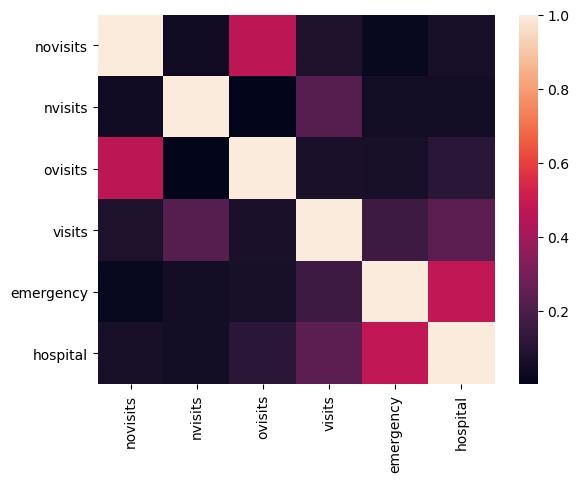

In [25]:
import seaborn as sns

sns.heatmap(visits_corr)

- There is no strong correlation between the number of visits.
- Not too much correlation between this variables. Mostly independent.
- Slight correlation between ovisits and novisits & hospital and emergency.

In [26]:
visits_df.describe()


,novisits,nvisits,ovisits,visits,emergency,hospital
count,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000
mean,0.536087,1.618021,0.750794,5.774399,0.263504,0.295960
std,3.879506,5.317056,3.652759,6.759225,0.703659,0.746398
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000
75%,0.000000,1.000000,0.000000,8.000000,0.000000,0.000000
max,155.000000,104.000000,141.000000,89.000000,12.000000,8.000000


regular visits is the highest (5.7)
emergency and hospital are the lowest.

### Gender and Marital Status Analysis

In [28]:
gender_df = df['gender']
gender_df.unique()

array(['male', 'female'], dtype=object)

In [29]:
gender_df.describe()

count       4406
unique         2
top       female
freq        2628
Name: gender, dtype: object

In [30]:
gender_df.value_counts()

gender
female    2628
male      1778
Name: count, dtype: int64

In [33]:
married_df = df['married']

In [32]:
married_df.value_counts()

married
yes    2406
no     2000
Name: count, dtype: int64

3.4 - School
3.5 - Income

In [16]:
df['school'].mean()

10.290285973672265

average is 10 years of school for this dataset

In [17]:
df['region'].value_counts()

region
other        1614
midwest      1157
northeast     837
west          798
Name: count, dtype: int64

In [18]:
df['income'].mean()

25271.239446209715

3.6 Employment Status
3.7 Insurance
3.8 Medical Aid

In [19]:
df['employed'].value_counts()

employed
no     3951
yes     455
Name: count, dtype: int64

In [20]:
df['insurance'].value_counts()

insurance
yes    3421
no      985
Name: count, dtype: int64

In [21]:
df['medicaid'].value_counts()

medicaid
no     4004
yes     402
Name: count, dtype: int64

## 4.2. Health and Gender
## 4.3. Income and Gender

In [22]:
age_gender_df = df.groupby(['age','gender'])
age_gender_df

In [23]:
age_gender_df.size()

age  gender
66   female    190
     male      160
67   female    198
     male      140
68   female    173
              ... 
98   male        1
99   female      1
102  female      1
     male        1
109  female      1
Length: 68, dtype: int64

In [24]:
#This data is groupby, you need to unstack to make operations like a normal dataframe
unstaked = age_gender_df.size().unstack()
unstaked['difference']=unstaked['female']-unstaked['male']
unstaked


gender,female,male,difference
age,,,
66,190.0,160.0,30.0
67,198.0,140.0,58.0
68,173.0,123.0,50.0
69,162.0,131.0,31.0
70,174.0,117.0,57.0
71,154.0,115.0,39.0
72,158.0,123.0,35.0
73,156.0,97.0,59.0
74,141.0,108.0,33.0


In [25]:
df.groupby(['health','gender']).size().unstack()

gender,female,male
health,,
average,2093,1416
excellent,193,150
poor,342,212


In [26]:
df.groupby(['income','gender']).size().unstack()

gender,female,male
income,,
-10125,1.0,1.0
-8179,NaN,1.0
0,12.0,6.0
14,1.0,NaN
72,1.0,NaN
...,...,...
230272,NaN,1.0
242161,1.0,NaN
360024,NaN,1.0


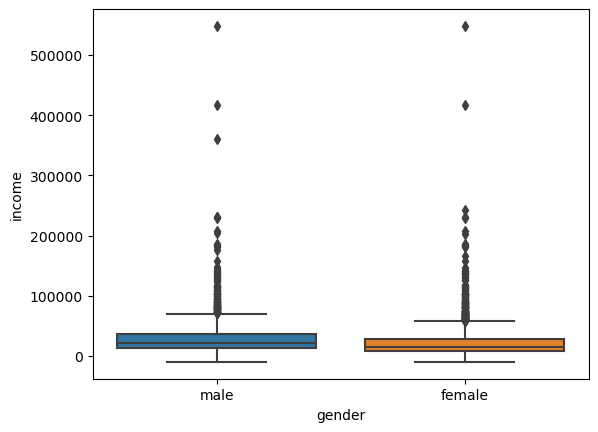

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.boxplot(data=df, x='gender', y='income')
plt.show()

# 4.4 Afam and Income
# 4.5 Region and Income
# 4.6 Age and Income


• AFAM Category and Income Comparison: Construct a table to compare the income levels within different AFAM categories.
• Regional Income Distribution: Prepare a table to display the income distribution across various regions.
• Age-wise Income Analysis: Develop a table to analyze the relationship between age and income.

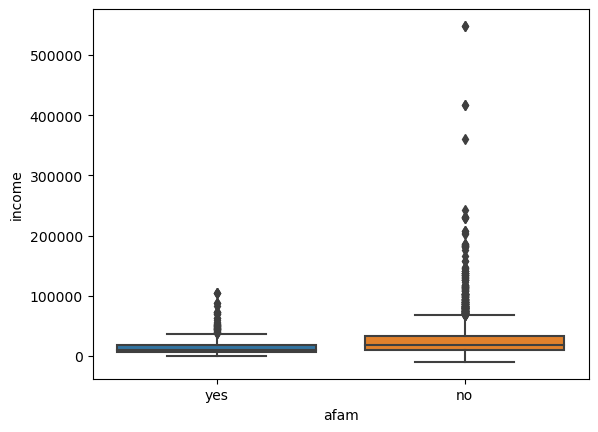

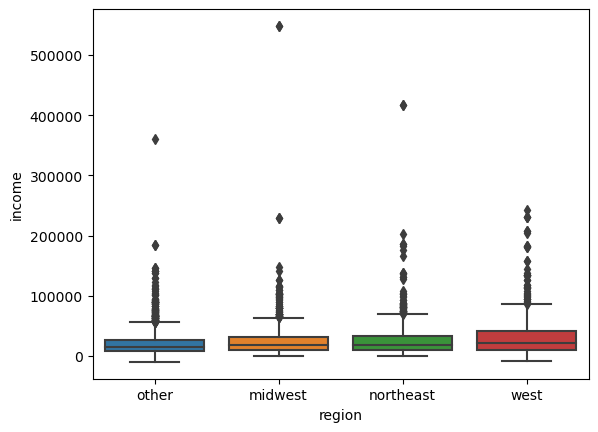

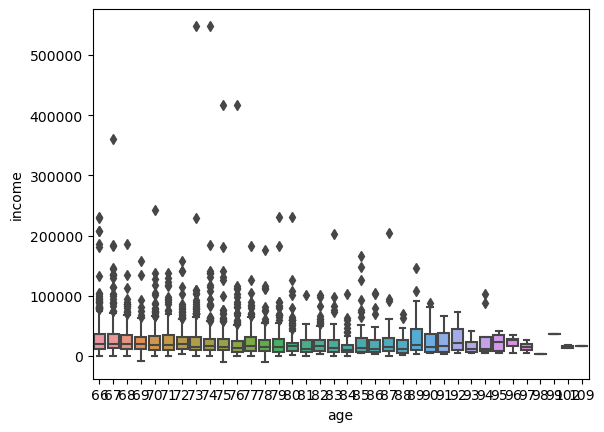

In [28]:
sns.boxplot(data=df, x='afam', y='income')
plt.show()

sns.boxplot(data=df, x='region', y='income')
plt.show()

sns.boxplot(data=df, x='age', y='income')
plt.show()

Age-wise Income Analysis: Develop a table to analyze the relationship between age and income.

In [29]:
df.groupby(['income','age']).size().unstack()

age,66,67,68,69,70,71,72,73,74,75,...,92,93,94,95,96,97,98,99,102,109
income,,,,,,,,,,,,,,,,,,,,,
-10125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-8179,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,1.0,1.0,NaN,1.0,2.0,1.0,NaN,1.0,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230272,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
242161,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
360024,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
age_income_df = df[['age','income']]
age_income_df.corr()

,age,income
age,1.00000,-0.07313
income,-0.07313,1.00000


Correlation did not give us a good indication of the relationship between age and income.
There is a slightly negative correlation, meaning that as age increases, income decreaess

<AxesSubplot:xlabel='age', ylabel='income'>

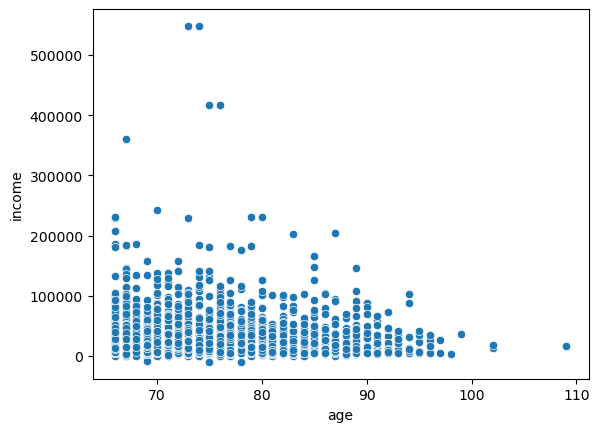

In [31]:
sns.scatterplot(data=df, x='age', y='income')

<AxesSubplot:xlabel='age', ylabel='income'>

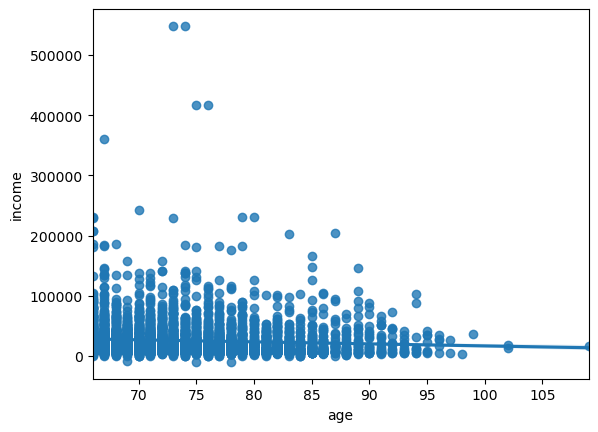

In [32]:
sns.regplot(data=df, x='age', y='income')

# Week 4

## Vizualize Categorical data

In [39]:
import seaborn as sns

# region_group = df.groupby('region')['visits'].sum().reset_index()
region_group = df.groupby(['region','health'])['visits'].mean().reset_index()
region_group

# boxplot is good for categoric and numeric data

,region,health,visits
0,midwest,average,5.282132
1,midwest,excellent,3.444444
2,midwest,poor,8.118182
3,northeast,average,5.694524
4,northeast,excellent,4.017544
5,northeast,poor,10.674419
6,other,average,5.088116
7,other,excellent,3.142857
8,other,poor,8.746324
9,west,average,6.499195


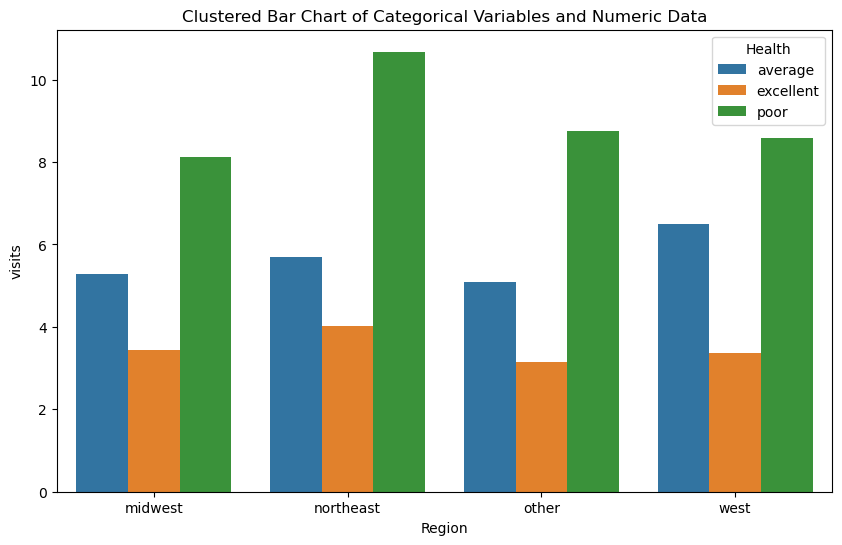

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns


# Create clustered bar chart
plt.figure(figsize=(10, 6))
# sns.barplot(data=region_group, x='region', y='visits', hue='health', ci=None)
sns.barplot(data=region_group, x='region', y='visits', hue='health', ci="bootstrapped")
plt.title('Clustered Bar Chart of Categorical Variables and Numeric Data')
plt.xlabel('Region')
plt.ylabel('visits')
plt.legend(title='Health')
plt.show()

<AxesSubplot:xlabel='region', ylabel='age'>

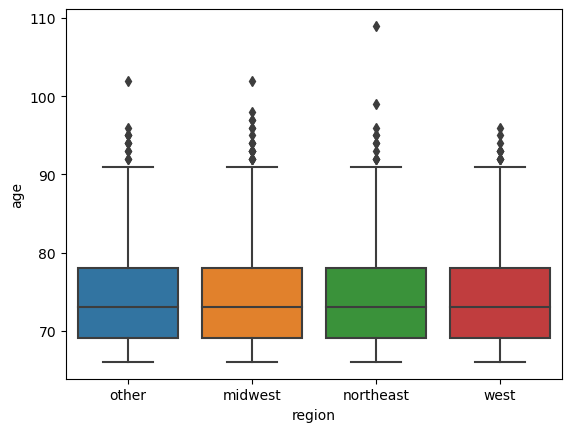

In [38]:

sns.boxplot(data=df, x='region', y='age')

<AxesSubplot:xlabel='region', ylabel='visits'>

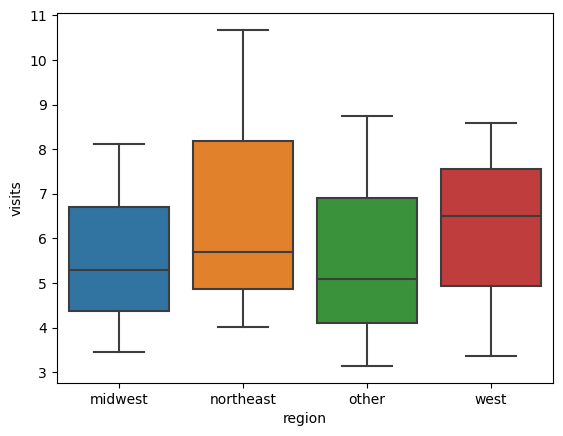

In [40]:
sns.boxplot(data=region_group, x='region', y='visits')

<AxesSubplot:xlabel='region', ylabel='school'>

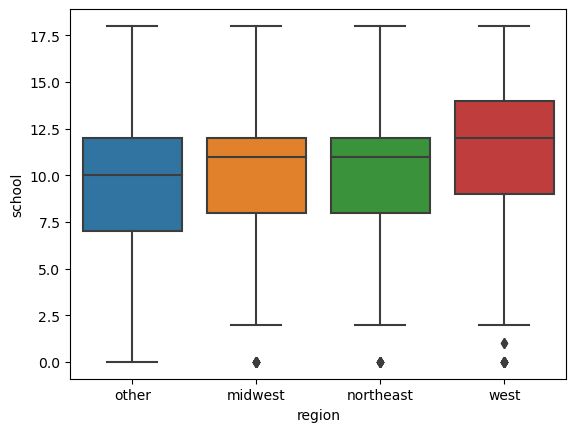

In [44]:
sns.boxplot(data=df, x='region', y='school')

In [ ]:
sns.boxplot(data=region_group, x='region', y='health')

In [ ]:
fig=plt.figure(figsize=(10,10))
ax1=fig.add_subplot(221)
sns.barplot(data=region_group, x=[['region', 'health']], y=region_group.visits, ax=ax1)

In [ ]:
sns.catplot(
    data=df, kind="bar",
    x="health", y="age", hue="gender",
    errorbar="sd", palette="dark", alpha=.6, height=6
)

<AxesSubplot:xlabel='health', ylabel='school'>

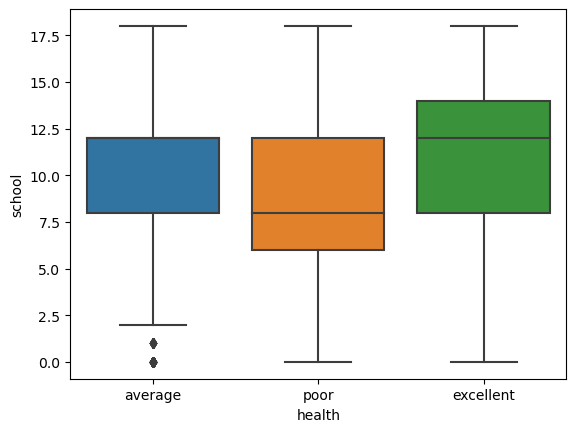

In [48]:
sns.boxplot(data=df, x='health', y='school')

## Vizualize numeric data

<AxesSubplot:xlabel='age', ylabel='income'>

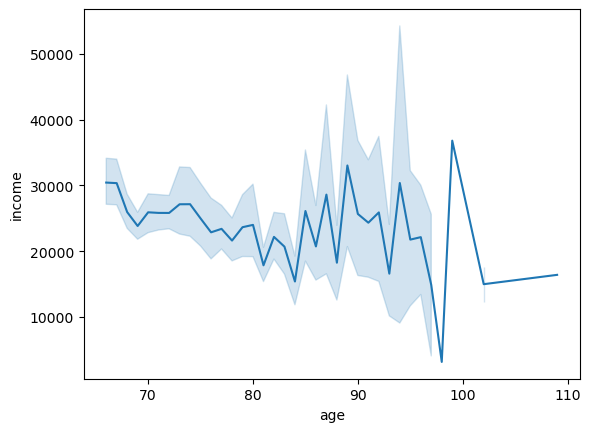

In [56]:
# See numerical data: Age vs Income
sns.lineplot(data=df, x='age', y='income')

<AxesSubplot:xlabel='age', ylabel='income'>

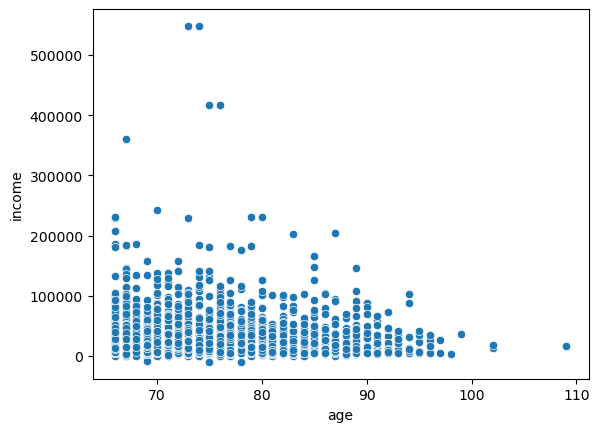

In [63]:
sns.scatterplot(data=df, x='age', y='income')

## Bonus - Statistical Anylysis

### hypothesis
Understand how health and region are related to age. 
Can we model age using any of those features?

<AxesSubplot:xlabel='health', ylabel='age'>

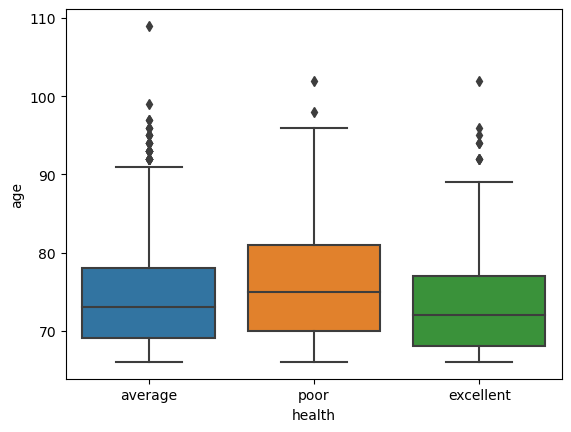

In [58]:
sns.boxplot(data=df, x='health', y='age')

## 2-way ANOVA

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols



# #Null Hypothesis
# #health and region have no impact on age
# meaning you can predict age based on health of region


# Define and fit the model
linear_model = ols('age ~ C(health)*C(region)', df).fit()
# linear_model = linear_model.fit()

# Perform ANOVA
results = sm.stats.anova_lm(linear_model, typ=2)
print(results)


based on those results, we reject the null hypothesis for health only because the P-value is small

<AxesSubplot:xlabel='health', ylabel='school'>

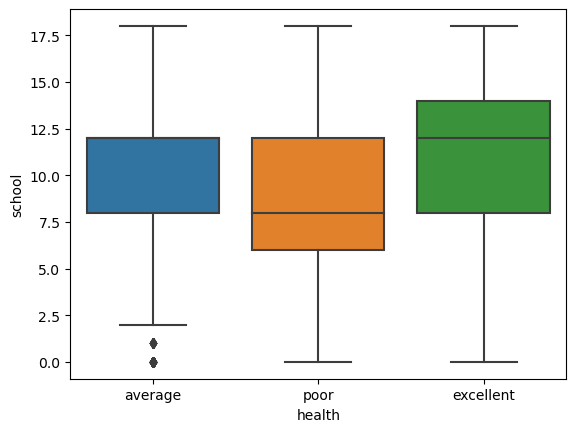

In [68]:
sns.boxplot(data=df, x='health', y='school')

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# hypothesis
# understand how health and region are related to school
# can we model age using any of those features?

# #Null Hypothesis
# #health and region have no impact on school
# meaning you can predict age based on health of region


# Define and fit the model
linear_model = ols('school ~ C(health)*C(region)', df).fit()

# Perform ANOVA
results = sm.stats.anova_lm(linear_model, typ=2)
print(results)
